# Setup

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

Define some (potentially?) useful fractions for setting inputs.

(In retrospect, it is easier to type 3*sixteenth than remember and type that this is 0.1875, but it's easier yet to type 3/16.0, so this isn't that useful.)

In [3]:
half = 1/2.
quarter = 1/4.
eighth = 1/8.
sixteenth = 1/16.

Here are some functions to help with formating values for printing, in particularly to getting aspect ratios of rectangles.

In [4]:
def formatRectSizes(w,h):
    return w, h, float(w)/float(h), float(h)/float(w)

def getBothARs(w,h):
    return float(w)/float(h), float(h)/float(w)


In [5]:
def convertToFrac(x):
    """
    Given some decimal number of inches, output it as a fraction.
    For example, 2.1875 = 2 and 3/16 inches, so convertToFrac(2.1875) returns (2,3,16)
    """
    inches = np.trunc(x)
    if inches == x:
        return int(inches), 0, 0
    denoms = [2,4,8,16]
    for denom in denoms:
        num = denom*(x-inches)
        if num == np.trunc(num):
            break
    return int(inches), int(num), int(denom)

convertToFrac(2.1875)

(2, 3, 16)

In [6]:
def convertToFeetAndInches(total):
    """
    Given some number of inches, return the number of feet and inches.
    """
    feet = int(np.trunc(total/12))
    inches = total - 12*feet
    return feet, inches


Round off values to the nearest eighth of an inch, since there's no way I'm cutting things to the nearest hundredth of an inch.

In [7]:
def roundOff(x, denom=8):
    return np.round(x*denom)/float(denom)

roundOff(0.95, 16)

0.9375

# Working Outward (solve for frame size)

Given the size of your artwork, mat, etc., how big will the frame be?

In [46]:
#specify frame thickness   <----------
frameThickness = 1.25
frameRabet = quarter

#specify size of art   <----------
artW = 8
artH = 8

#specify float (can be zero)   <----------
floatL = 0
floatR = 0
floatT = 0
floatB = 0

#calculated
windowW = artW + floatL + floatR
windowH = artH + floatT + floatB

#specify size of mat board   <----------
matBorderL = 3
matBorderR = matBorderL
matBorderT = 3
matBorderB = 3

#calculated
frameInW = windowW + matBorderL + matBorderR
frameInH = windowH + matBorderT + matBorderB

#calculated
frameOutW = frameInW + 2*frameThickness
frameOutH = frameInH + 2*frameThickness

print("Frame size:  {:6.3f} x {:6.3f}".format(frameOutW, frameOutH))
print("  (width:    {:2d} {:d}/{:d}\")".format(*convertToFrac(frameOutW)))
print("  (height:   {:2d} {:d}/{:d}\")".format(*convertToFrac(frameOutH)))

Frame size:  16.500 x 16.500
  (width:    16 1/2")
  (height:   16 1/2")


# Working Inward (solve for art size)

This is a rather rarer situation, but occasionally I have a frame size in mind and want to create a print for it of the correct size.

In [8]:
#specify frame thickness   <----------
frameThickness = 7*eighth
frameRabet = quarter

#specify final size of frame   <----------
frameOutW = 17.25
frameOutH = 21.25

#calculated
frameInW = frameOutW - 2*frameThickness
frameInH = frameOutH - 2*frameThickness

#specify size of mat board   <----------
matBorderL = 3
matBorderR = matBorderL
matBorderT = 3
matBorderB = 5

#calculated
windowW = frameInW - (matBorderL + matBorderR)
windowH = frameInH - (matBorderT + matBorderB)

#specify float (can be zero)   <----------
floatL = eighth
floatR = eighth
floatT = eighth
floatB = eighth

#calculated
artW = windowW - (floatL + floatR)
artH = windowH - (floatT + floatB)

print("art size:    {:6.3f}\" x {:6.3f}\"".format(artW, artH))
print("  (width:    {:2d} {:d}/{:d}\")".format(*convertToFrac(artW)))
print("  (height:   {:2d} {:d}/{:d}\")".format(*convertToFrac(artH)))

art size:     9.250" x 11.250"
  (width:     9 1/4")
  (height:   11 1/4")


# Working Middle-ward (?) (solve for mat size)

Given a frame I want to use, and an existing piece of artwork, how big wil the mat end up being?

In [9]:
#specify frame thickness   <----------
frameThickness = 7*eighth
frameRabet = quarter

#specify size of art   <----------
artW = 11.75
artH = 12

#specify final size of frame   <----------
frameOutW = 17.25
frameOutH = 17.25

#specify float (can be zero)   <----------
floatL = 0
floatR = 0
floatT = 0
floatB = 0

#calculated
frameInW = frameOutW - 2*frameThickness
frameInH = frameOutH - 2*frameThickness

#calculated
windowW = artW + floatL + floatR
windowH = artH + floatT + floatB

#calculated
matBorderL = (frameInW - windowW)/2.0
matBorderR = (frameInW - windowW)/2.0
matBorderT = (frameInH - windowH)/2.0
matBorderB = (frameInH - windowH)/2.0

print("Mat board margin left:   {:.3f}\"   ({:d} {:d}/{:d}\")".format(matBorderL, *convertToFrac(matBorderL)))
print("Mat board margin right:  {:.3f}\"   ({:d} {:d}/{:d}\")".format(matBorderR, *convertToFrac(matBorderR)))
print("Mat board margin top:    {:.3f}\"   ({:d} {:d}/{:d}\")".format(matBorderT, *convertToFrac(matBorderT)))
print("Mat board margin bottom: {:.3f}\"   ({:d} {:d}/{:d}\")".format(matBorderB, *convertToFrac(matBorderB)))


Mat board margin left:   1.875"   (1 7/8")
Mat board margin right:  1.875"   (1 7/8")
Mat board margin top:    1.750"   (1 3/4")
Mat board margin bottom: 1.750"   (1 3/4")


# Monophonic

Solve for frame & mat size to equalize the aspect ratio of the art and frame.

In [10]:
roundDimensions = True

#specify frame thickness   <----------
frameThickness = 7*eighth
frameRabet = quarter

#specify size of art   <----------
artW = 9.5
artH = 7.75

#calculated
targetAR = float(artW)/float(artH)

#specify one dimension and leave the other zero
frameOutW = 17.25
frameOutH = 0

if frameOutH == 0.0:
    frameOutH = frameOutW / targetAR
elif frameOutW == 0.0:
    frameOutW = frameOutH * targetAR

if roundDimensions:
    frameOutH = roundOff(frameOutH, 8)
    frameOutW = roundOff(frameOutW, 8)

print("Frame size:         {:6.3f} x {:6.3f}".format(frameOutW, frameOutH))
print("Frame aspect ratio:  {:.3f} | {:.3f}".format(*getBothARs(frameOutW,frameOutH)))
print("Art aspect ratio:    {:.3f} | {:.3f}".format(*getBothARs(artW,artH)))

#specify float (can be zero)   <----------
floatL = 0.0
floatR = 0.0
floatT = 0.0
floatB = 0.0

#calculated
frameInW = frameOutW - 2*frameThickness
frameInH = frameOutH - 2*frameThickness

#calculated
windowW = artW + floatL + floatR
windowH = artH + floatT + floatB

#calculated
matBorderL = (frameInW - windowW)/2.0
matBorderR = (frameInW - windowW)/2.0
matBorderT = (frameInH - windowH)/2.0
matBorderB = (frameInH - windowH)/2.0

print("")
print("Mat board margin left:   {:.3f}\"   ({:d} {:d}/{:d}\")".format(matBorderL, *convertToFrac(matBorderL)))
print("Mat board margin right:  {:.3f}\"   ({:d} {:d}/{:d}\")".format(matBorderR, *convertToFrac(matBorderR)))
print("Mat board margin top:    {:.3f}\"   ({:d} {:d}/{:d}\")".format(matBorderT, *convertToFrac(matBorderT)))
print("Mat board margin bottom: {:.3f}\"   ({:d} {:d}/{:d}\")".format(matBorderB, *convertToFrac(matBorderB)))


Frame size:         17.250 x 14.125
Frame aspect ratio:  1.221 | 0.819
Art aspect ratio:    1.226 | 0.816

Mat board margin left:   3.000"   (3 0/0")
Mat board margin right:  3.000"   (3 0/0")
Mat board margin top:    2.312"   (2 5/16")
Mat board margin bottom: 2.312"   (2 5/16")


# Plotting

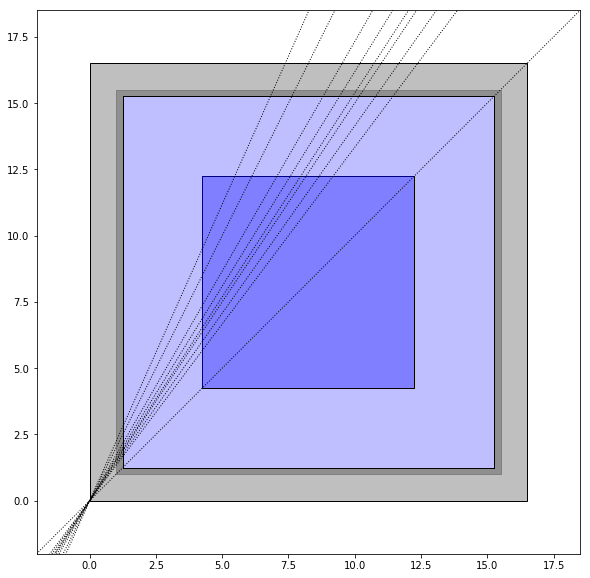

In [47]:
centeredAtOrigin = False

imgMargin = 2
imgW = frameOutW + 2*imgMargin
imgH = frameOutH + 2*imgMargin

plt.figure(figsize=(10,10))
currentAxis = plt.gca()
currentAxis.set_aspect('equal')

if centeredAtOrigin:
    originX = -1*frameOutW/2.0
    originY = -1*frameOutH/2.0
    currentAxis.set_xlim(-1*imgW/2.0, imgW/2.0)
    currentAxis.set_ylim(-1*imgH/2.0, imgH/2.0)
else:
    originX = 0
    originY = 0
    currentAxis.set_xlim(-1*imgMargin,imgW-imgMargin)
    currentAxis.set_ylim(-1*imgMargin,imgH-imgMargin)

# outside of frame
currentAxis.add_patch(Rectangle((originX, originY),
                                frameOutW, frameOutH,
                                edgecolor=(0,0,0), facecolor=(0,0,0,0.25)))
# glazing etc:
currentAxis.add_patch(Rectangle((originX+frameThickness-frameRabet, originY+frameThickness-frameRabet),
                                frameInW+2*frameRabet, frameInH+2*frameRabet,
                                edgecolor=(0.5,0.5,0.5), facecolor=(0,0,0,0.25)))
# inside of frame:
# (this resets this area of the canvas to white)
currentAxis.add_patch(Rectangle((originX+frameThickness, originY+frameThickness),
                                frameInW, frameInH,
                                edgecolor=(0,0,0), facecolor=(1,1,1)))
# matting:
currentAxis.add_patch(Rectangle((originX+frameThickness, originY+frameThickness),
                                frameInW, frameInH,
                                edgecolor=(0,0,0), facecolor=(0,0,1,0.25)))
# (this resets this area of the canvas to white)
currentAxis.add_patch(Rectangle((originX+frameThickness+matBorderL, originY+frameThickness+matBorderB),
                                windowW, windowH,
                                edgecolor=(0,0,0), facecolor=(1,1,1)))

# artwork
currentAxis.add_patch(Rectangle((originX+frameThickness+matBorderL+floatL, originY+frameThickness+matBorderB+floatB),
                                artW, artH,
                                edgecolor='none', facecolor=(0,0,1,0.5)))

# A selection from proportion from Jan Tschichold, Robert Bringhurst, etc.
desiredARs = [
    1.0,
    4.0/3.0, # 1.333
    np.sqrt(2.0), # 1.414
    3.0/2.0, # 1.500
    1.538, # (height of pentagon with unit side)
    (1.0+np.sqrt(5.0))/2.0, #1.618 (phi)
    np.sqrt(3.0), # 1.732
    2.0,
    np.sqrt(5.0), # 2.236 
]

for ar in desiredARs:
    if frameOutW > frameOutH:
        diagonalSlope = 1.0/ar
    else:
        diagonalSlope = ar
    x = np.linspace(*currentAxis.get_xlim(), 2)
    y = diagonalSlope*x
    plt.plot(x,y,'k:',lw=1.0)

plt.show()

# Results

In [37]:

linLength = 2*frameOutW+2*frameOutH
linLengthFt = int(np.trunc(linLength/12))
linLengthIn = linLength - 12*linLengthFt
linLengthFt, linLengthIn = convertToFeetAndInches(linLength)

print("Frame length:     {:.3f}\"   ({:d}\' {:d} {:d}/{:d}\")".format(linLength, linLengthFt, *convertToFrac(linLengthIn)))

print("")
print("Glazing size:     {:>5.2f}\" x {:>5.2f}\"".format(frameInW+2*frameRabet, frameInH+2*frameRabet))

print("")
print("Aspect ratios")
print("  Frame outside:  {:>5.2f}\" x {:>5.2f}\"    {:.3f} | {:.3f}".format(*formatRectSizes(frameOutW,frameOutH)))
print("  Frame inside:   {:>5.2f}\" x {:>5.2f}\"    {:.3f} | {:.3f}".format(*formatRectSizes(frameInW,frameInH)))
print("  Mat window:     {:>5.2f}\" x {:>5.2f}\"    {:.3f} | {:.3f}".format(*formatRectSizes(windowW,windowH)))
print("  Artwork:        {:>5.2f}\" x {:>5.2f}\"    {:.3f} | {:.3f}".format(*formatRectSizes(artW,artH)))


Frame length:     52.000"   (4' 4 0/0")

Glazing size:     11.50" x 11.50"

Aspect ratios
  Frame outside:  13.00" x 13.00"    1.000 | 1.000
  Frame inside:   11.00" x 11.00"    1.000 | 1.000
  Mat window:      7.00" x  7.00"    1.000 | 1.000
  Artwork:         7.00" x  7.00"    1.000 | 1.000
